## Iris Dataset - Exercício Introdutório de Ciência de Dados

### 0. Importação de Bibliotecas (libs ou packages)

In [1]:
# Manipulação de dados em formato tabular (DataFrames): Permite ler, limpar, filtrar e transformar dados de forma eficiente.
import pandas as pd

In [2]:
#Operações numéricas e vetoriais: Oferece funções para arrays, operações matemáticas e criação de novas colunas (como no uso de np.where).
import numpy as np

In [3]:
# Visualizações estatísticas com estilo elegante: Facilita gráficos como boxplot, scatterplot e heatmaps, com suporte nativo a DataFrames do pandas.
import seaborn as sns

In [4]:
# Criação de gráficos personalizados: Usado em conjunto com seaborn para controlar detalhes dos gráficos, como tamanho e títulos.
import matplotlib.pyplot as plt

In [5]:
# Carrega datasets prontos da scikit-learn: Aqui, traz o famoso Iris Dataset, já dividido em data e target.
from sklearn.datasets import load_iris

In [6]:
# Divide os dados em treino e teste: Muito usado para separar uma parte dos dados para avaliar o desempenho do modelo.
from sklearn.model_selection import train_test_split

In [7]:
# Modelo de regressão logística (classificação): Classificador simples e eficiente para problemas com múltiplas classes (como prever a espécie da flor).
from sklearn.linear_model import LogisticRegression

In [8]:
# Padroniza as variáveis numéricas: Transforma os dados para terem média 0 e desvio padrão 1, o que melhora o desempenho de muitos modelos.
from sklearn.preprocessing import StandardScaler

In [9]:
np.random.seed(42)

### 1. Carregamento do dataset

In [10]:
iris_data = load_iris()
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)

# 2. Inspeção Inicial
print("Shape:", df.shape)
print("Tipos de dados:", df.dtypes)
display("Primeiras linhas:", df.tail(20))


Shape: (150, 5)
Tipos de dados: sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species              category
dtype: object


'Primeiras linhas:'

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
130,7.4,2.8,6.1,1.9,virginica
131,7.9,3.8,6.4,2.0,virginica
132,6.4,2.8,5.6,2.2,virginica
133,6.3,2.8,5.1,1.5,virginica
134,6.1,2.6,5.6,1.4,virginica
135,7.7,3.0,6.1,2.3,virginica
136,6.3,3.4,5.6,2.4,virginica
137,6.4,3.1,5.5,1.8,virginica
138,6.0,3.0,4.8,1.8,virginica
139,6.9,3.1,5.4,2.1,virginica


### 3. Estatísticas descritivas

In [11]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [12]:
df.groupby('species')[['sepal length (cm)','sepal width (cm)']].mean()

,sepal length (cm),sepal width (cm)
species,,
setosa,5.006,3.428
versicolor,5.936,2.770
virginica,6.588,2.974


In [13]:
print("\nEstatísticas gerais:\n")
display(df.describe())

print("\nMédia por espécie:\n")
display(df.groupby('species').mean())


Estatísticas gerais:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Média por espécie:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [14]:
### dados ausentes: missing, NaN

df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

### 4. Visualizações

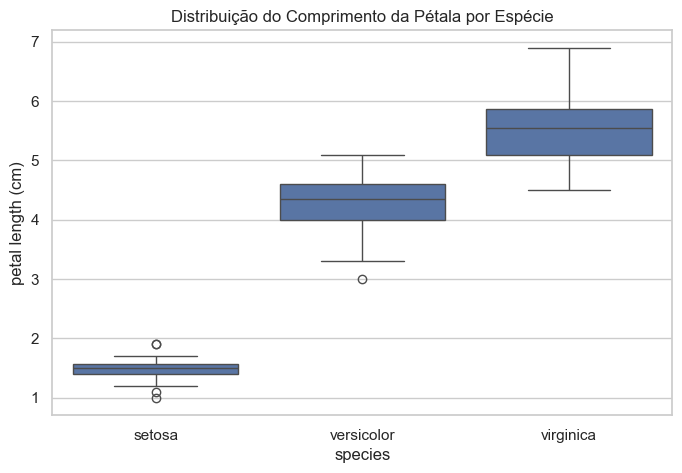

In [15]:
sns.set(style="whitegrid")

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x="species", y="petal length (cm)", data=df)
plt.title("Distribuição do Comprimento da Pétala por Espécie")
plt.show()

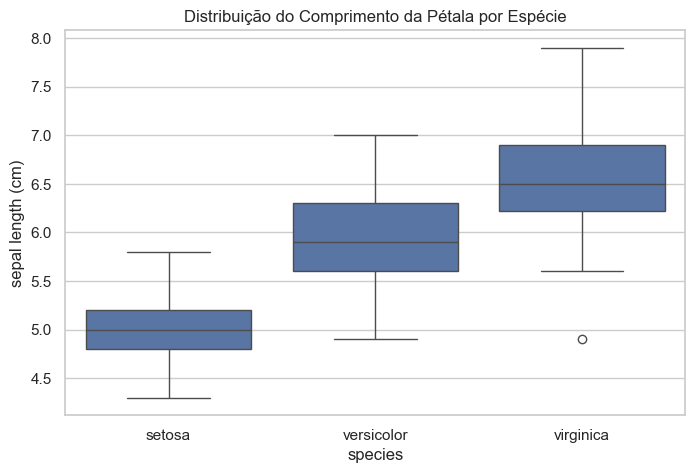

In [16]:
sns.set(style="whitegrid")

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x="species", y="sepal length (cm)", data=df)
plt.title("Distribuição do Comprimento da Pétala por Espécie")
plt.show()

## 1. ANOVA (Análise de Variância)

Hipóteses da ANOVA<br>
H₀ (nula): As médias do comprimento da pétala são iguais entre as espécies.<br>
H₁ (alternativa): Pelo menos uma das espécies tem média diferente.<br>

In [17]:
from scipy.stats import f_oneway

# Separar os grupos
setosa = df[df['species'] == 'setosa']['petal length (cm)']
versicolor = df[df['species'] == 'versicolor']['petal length (cm)']
virginica = df[df['species'] == 'virginica']['petal length (cm)']

# ANOVA
f_stat, p_val = f_oneway(setosa, versicolor, virginica)
print(f"Estatística F: {f_stat:.4f} | p-valor: {p_val:.4e}")

Estatística F: 1180.1612 | p-valor: 2.8568e-91


Como interpretar os números:
O valor extremamente alto da estatística F (1180.16) indica que a variação entre os grupos (espécies) é muito maior que a variação dentro dos grupos.

O p-valor ≈ 0 (2.85e-91) é muito menor que 0.05, portanto rejeitamos a hipótese nula com confiança.

## 2. Kruskal-Wallis H-Test (versão não paramétrica da ANOVA)

Hipóteses do Kruskal-Wallis:<br>
H₀ (nula): As distribuições do comprimento da pétala são iguais entre as três espécies.<br>
H₁ (alternativa): Pelo menos uma espécie tem uma distribuição diferente.<br>

In [18]:
from scipy.stats import kruskal

h_stat, p_val = kruskal(setosa, versicolor, virginica)
print(f"Estatística H: {h_stat:.4f} | p-valor: {p_val:.4e}")

Estatística H: 130.4110 | p-valor: 4.8040e-29


A estatística H = 130.41 indica forte evidência de diferença entre os grupos.<br>
O p-valor é extremamente pequeno (4.80e-29), muito menor que o limiar de 0.05.<br>

Rejeitamos a hipótese nula ⇒ existe diferença estatística significativa entre as espécies em relação ao comprimento da pétala.

## 3. Testes adicionais úteis para diagnóstico (opcional)

O teste de Shapiro-Wilk verifica se a variável segue uma distribuição normal dentro de cada grupo (species).<br>
Hipótese nula (H₀): os dados seguem uma distribuição normal.<br>
Regra prática: se p > 0.05, não rejeitamos H₀ ⇒ os dados podem ser considerados normais.

In [19]:
from scipy.stats import shapiro

for species_name, group in df.groupby("species"):
    stat, p = shapiro(group["petal length (cm)"])
    print(f"{species_name}: p-valor do Shapiro-Wilk = {p:.4f}")

setosa: p-valor do Shapiro-Wilk = 0.0548
versicolor: p-valor do Shapiro-Wilk = 0.1585
virginica: p-valor do Shapiro-Wilk = 0.1098


Nenhum grupo teve p-valor menor que 0.05.<br>

Portanto, não há evidência suficiente para rejeitar a normalidade nos três grupos.<br>

➡️ A suposição de normalidade para ANOVA está razoavelmente atendida.

## Teste de Levene

Hipótese nula (H₀): os grupos possuem variâncias iguais (homocedasticidade).<br>

Se p-valor < 0.05, rejeitamos H₀ ⇒ as variâncias são diferentes (heterocedasticidade).

In [20]:
from scipy.stats import levene

stat, p = levene(setosa, versicolor, virginica)
print(f"Levene test p-valor: {p:.4f}")

Levene test p-valor: 0.0000


O p-valor é praticamente zero, então rejeitamos a hipótese nula.<br>
Isso indica que as variâncias dos comprimentos de pétala não são iguais entre as espécies.

⚠️ Implicação para o uso da ANOVA:<br>
A ANOVA clássica assume variâncias homogêneas. Como essa suposição foi violada, o resultado da ANOVA deve ser interpretado com cautela.

✅ O Kruskal-Wallis, que não depende da homogeneidade de variâncias, continua sendo válido e confirmou a diferença significativa entre os grupos.

## Resumo dos Testes

| Teste          | Tipo            | Quando usar                           |
| -------------- | --------------- | ------------------------------------- |
| ANOVA          | Paramétrico     | Se normalidade e variâncias forem ok  |
| Kruskal-Wallis | Não-paramétrico | Quando há suspeita de não-normalidade |
| Shapiro-Wilk   | Diagnóstico     | Testar normalidade dos grupos         |
| Levene         | Diagnóstico     | Testar homogeneidade de variâncias    |


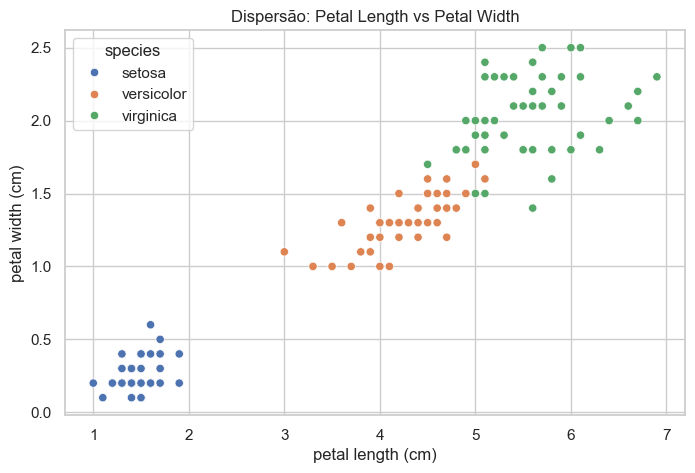

In [68]:
# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x="petal length (cm)",
    y="petal width (cm)",
    hue="species",
    palette="deep"
)
plt.title("Dispersão: Petal Length vs Petal Width")
plt.show()

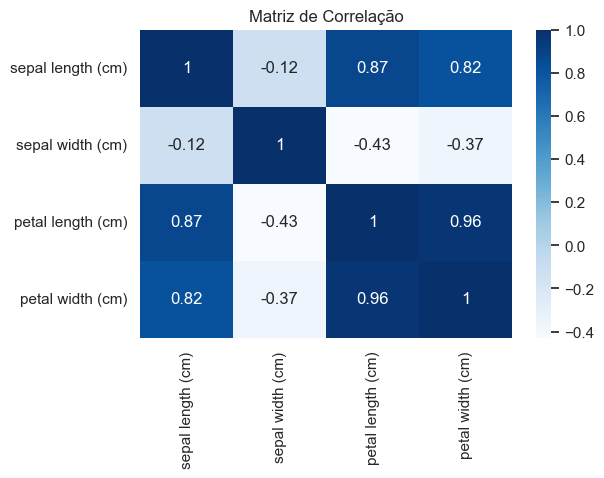

In [69]:
# Heatmap de correlação
plt.figure(figsize=(6, 4))
sns.heatmap(df.drop(columns='species').corr(), annot=True, cmap="Blues")
plt.title("Matriz de Correlação")
plt.show()

In [72]:
# 5. Criação de nova coluna categórica
petal_threshold = df["petal length (cm)"].median()

df["petal_size"] = np.where(df["petal length (cm)"] > petal_threshold, "grande", "pequena")

print("\nDistribuição de petal_size:\n", df["petal_size"].value_counts())


Distribuição de petal_size:
 petal_size
pequena    75
grande     75
Name: count, dtype: int64


In [73]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,petal_size
0,5.1,3.5,1.4,0.2,setosa,pequena
1,4.9,3.0,1.4,0.2,setosa,pequena
2,4.7,3.2,1.3,0.2,setosa,pequena
3,4.6,3.1,1.5,0.2,setosa,pequena
4,5.0,3.6,1.4,0.2,setosa,pequena
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,grande
146,6.3,2.5,5.0,1.9,virginica,grande
147,6.5,3.0,5.2,2.0,virginica,grande
148,6.2,3.4,5.4,2.3,virginica,grande


In [74]:
# 6. Modelo simples (Logistic Regression)
features = ["petal length (cm)", "petal width (cm)"]
X = df[features]
y = df["species"]

In [77]:
X

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


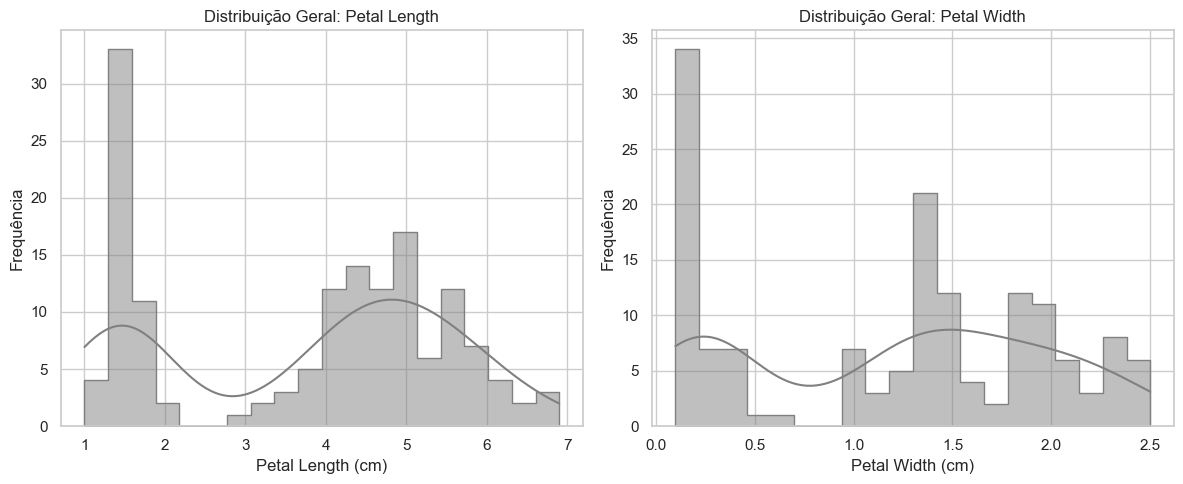

In [94]:
# 6a. Histogramas das features (distribuição geral, sem usar o target)
plt.figure(figsize=(12, 5))

# Histograma para petal length
plt.subplot(1, 2, 1)
sns.histplot(x=X["petal length (cm)"], kde=True, bins=20, color="gray", element="step")
plt.title("Distribuição Geral: Petal Length")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequência")

# Histograma para petal width
plt.subplot(1, 2, 2)
sns.histplot(x=X["petal width (cm)"], kde=True, bins=20, color="gray", element="step")
plt.title("Distribuição Geral: Petal Width")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()


In [78]:
X.describe()

,petal length (cm),petal width (cm)
count,150.000000,150.000000
mean,3.758000,1.199333
std,1.765298,0.762238
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


In [79]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

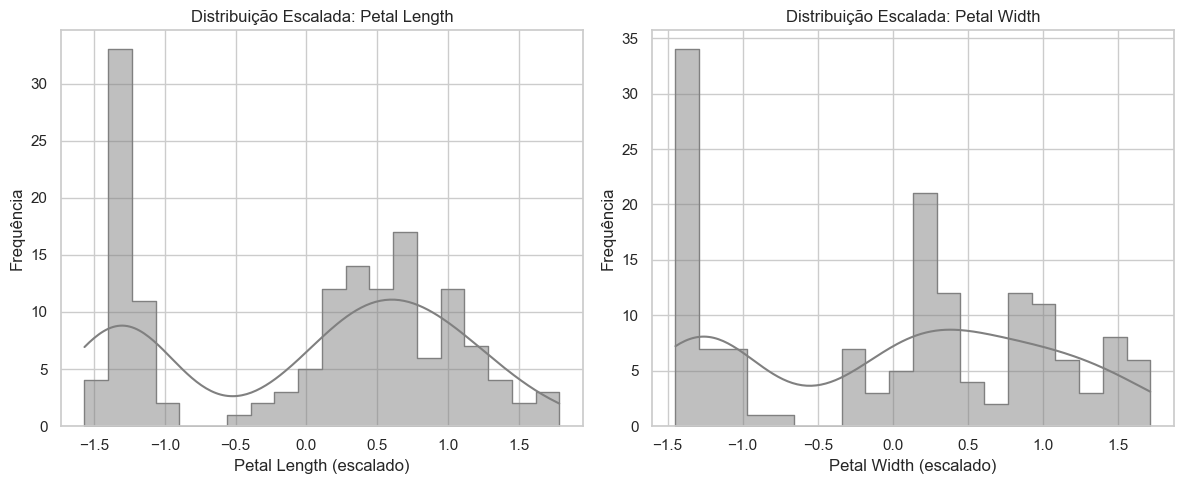

In [87]:
# 6a. Histogramas das features escaladas (sem target)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cria DataFrame com as features escaladas
df_scaled = pd.DataFrame(X_scaled, columns=features)

plt.figure(figsize=(12, 5))

# Histograma para petal length
plt.subplot(1, 2, 1)
sns.histplot(data=df_scaled, x="petal length (cm)", kde=True, bins=20, color="gray", element="step")
plt.title("Distribuição Escalada: Petal Length")
plt.xlabel("Petal Length (escalado)")
plt.ylabel("Frequência")

# Histograma para petal width
plt.subplot(1, 2, 2)
sns.histplot(data=df_scaled, x="petal width (cm)", kde=True, bins=20, color="gray", element="step")
plt.title("Distribuição Escalada: Petal Width")
plt.xlabel("Petal Width (escalado)")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()


In [84]:
pd.DataFrame(X_scaled, columns=features).describe()

,petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02
mean,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00
min,-1.567576e+00,-1.447076e+00
25%,-1.226552e+00,-1.183812e+00
50%,3.364776e-01,1.325097e-01
75%,7.627583e-01,7.906707e-01
max,1.785832e+00,1.712096e+00


In [ ]:
# semente de reprodutibilidade: random_state

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [99]:
X_test.shape

(30, 2)

In [100]:
y_test.shape

(30,)

In [103]:
model = LogisticRegression(max_iter=200)

In [104]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [105]:
acc = model.score(X_test, y_test)
print(f"\nAcurácia do modelo com 2 features: {acc:.2%}")


Acurácia do modelo com 2 features: 100.00%


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()

model_dt.fit(X_train, y_train)

acc = model_dt.score(X_test, y_test)
print(f"\nAcurácia do modelo com 2 features: {acc:.2%}")

DecisionTreeClassifier()

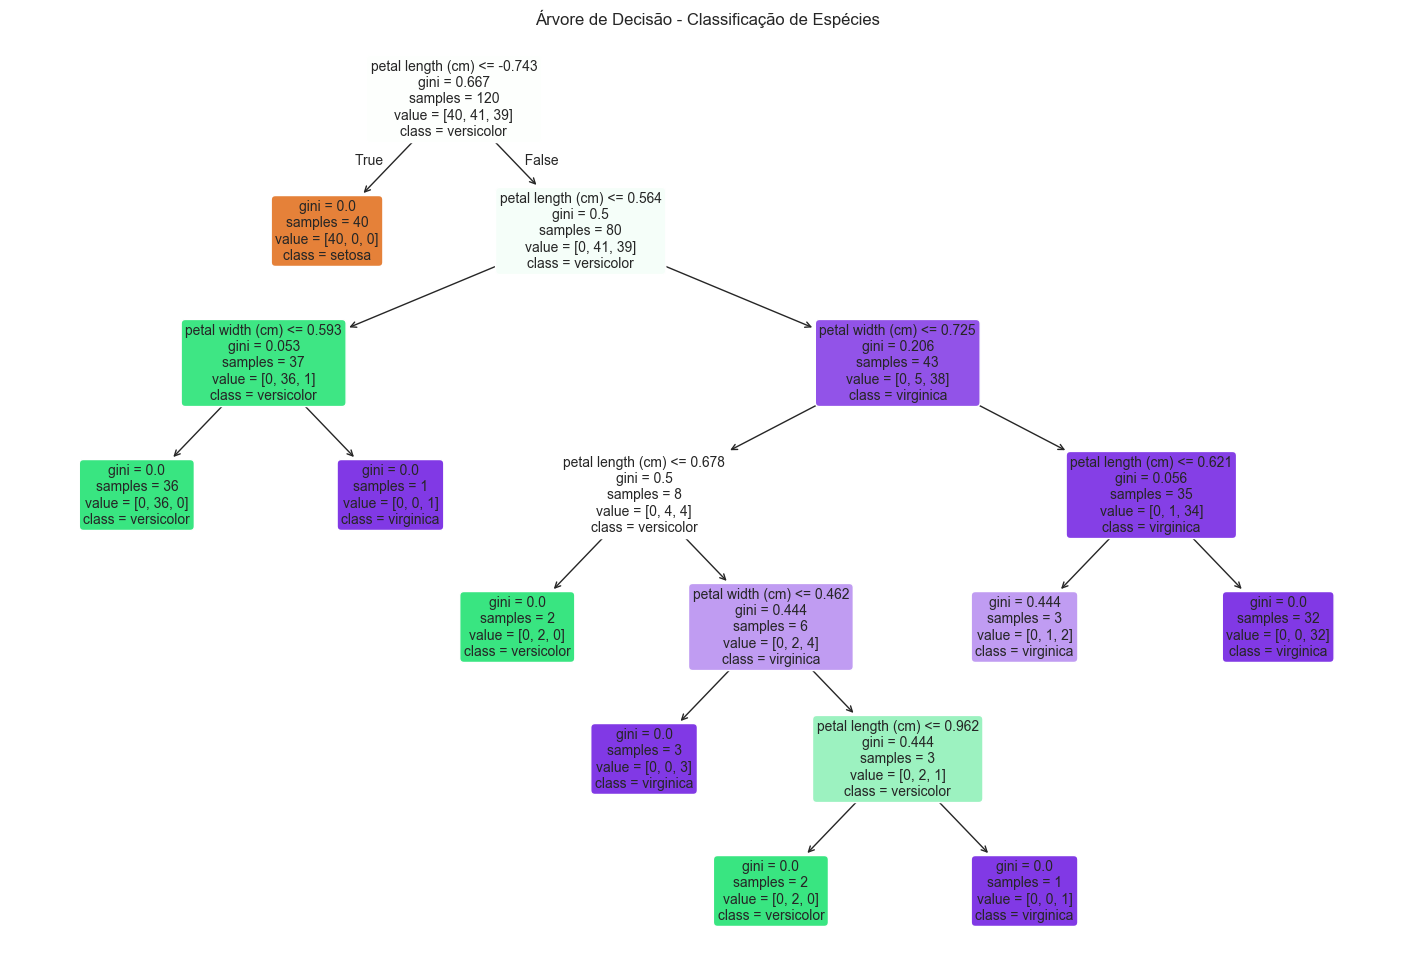

In [110]:
from sklearn.tree import plot_tree

# 7. Visualização da Árvore de Decisão
plt.figure(figsize=(18, 12))
plot_tree(
    model_dt,
    feature_names=features,
    class_names=model_dt.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árvore de Decisão - Classificação de Espécies")
plt.show()
